In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import cv2
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_recall_fscore_support, roc_curve, auc, precision_score,recall_score, f1_score
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [33]:
cat_file_path = "/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat"
dog_file_path = "/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog"

In [34]:
import plotly.express as px

class_names = ['Cat', 'Dog'] 
n_dogs = len(os.listdir(cat_file_path))
n_cats = len(os.listdir(dog_file_path))
n_images = [n_cats, n_dogs]

fig = px.bar(x=class_names, y=n_images, color=class_names, labels={'x': 'Class', 'y': 'Number of Images'}, title='Dog vs Cat')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [76]:
def load_image(image_path):
    return cv2.imread(image_path)

def random_rotation(image):
    rows, cols, _ = image.shape
    angle = random.randint(-30, 30)
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    return cv2.warpAffine(image, M, (cols, rows))

def horizontal_flip(image):
    return cv2.flip(image, 1)

def vertical_flip(image):
    return cv2.flip(image, 0)

def random_scaling(image):
    rows, cols, _ = image.shape
    scale = random.uniform(0.9, 1.1)
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 0, scale)
    return cv2.warpAffine(image, M, (cols, rows))

def image_translation(image):
    rows, cols, _ = image.shape
    max_trans = 20
    tx = random.randint(-max_trans, max_trans)
    ty = random.randint(-max_trans, max_trans)
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(image, M, (cols, rows))

In [35]:
data = []

In [36]:
print(data)

[]


In [ ]:
for img in os.listdir(cat_file_path):
        img_path = os.path.join(cat_file_path, img)
        label = 0
        arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if arr is None:
            print(f"Error loading image: {img_path}")
        else:
            new_arr = cv2.resize(arr, (150, 150))
#             data.append([new_arr, label])
            image_path = img_path
            image = load_image(image_path)
            # Apply transformations
            augmented_image = random_rotation(image)
            augmented_image = horizontal_flip(augmented_image)
            augmented_image = vertical_flip(augmented_image)
            augmented_image = random_scaling(augmented_image)
            augmented_image = image_translation(augmented_image)
            print(augumented_image)
            # Display the image
            augmented_image_rgb = cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB)

            plt.imshow(augmented_image_rgb)
            plt.title('Augmented Image')
            plt.show()

In [38]:
for img in os.listdir(dog_file_path):
        img_path = os.path.join(dog_file_path, img)
        label = 1
        arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if arr is None:
            print(f"Error loading image: {img_path}")
        else:
            new_arr = cv2.resize(arr, (150, 150))
            data.append([new_arr, label])

Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/6059.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11849.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/3288.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/6238.jpg


Corrupt JPEG data: 226 extraneous bytes before marker 0xd9


Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/2688.jpg


Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/7112.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/8730.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11702.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/7133.jpg


Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11853.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/7969.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/7459.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/10747.jpg


Corrupt JPEG data: 254 extraneous bytes before marker 0xd9


Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/6718.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/2877.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/3136.jpg


Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9


Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11675.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/4367.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/Thumbs.db
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/5604.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/9188.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/3588.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11410.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/1308.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/10158.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/2384.jpg


Corrupt JPEG data: 399 extraneous bytes before marker 0xd9


Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/1866.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/7369.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/10797.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/10401.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/5736.jpg


In [39]:
print(data[0])

[array([[ 90, 105,  79, ..., 108,  77,  15],
       [ 67,  76,  55, ...,  92,  97,  19],
       [157, 164, 124, ...,  72, 111,  28],
       ...,
       [196, 203, 217, ...,  66,  78, 121],
       [208, 226, 222, ...,  52, 105, 100],
       [204, 214, 229, ...,  37, 146,  70]], dtype=uint8), 0]


In [40]:
random.shuffle(data)

In [41]:
data[0]

[array([[124, 126, 129, ...,  11,  12,  11],
        [137, 133, 128, ...,  11,  12,   9],
        [138, 141, 142, ...,  11,   8,  12],
        ...,
        [ 88,  88,  86, ..., 188, 187, 178],
        [ 85,  90,  89, ..., 189, 191, 184],
        [ 83,  95,  90, ..., 194, 196, 188]], dtype=uint8),
 1]

In [42]:
train_data,test_data  = train_test_split(data, train_size=0.8, random_state=42)

In [43]:
len(train_data)

19956

In [44]:
train_data[0]

[array([[ 92,  95,  98, ..., 172, 168, 167],
        [ 94,  98, 101, ..., 177, 173, 172],
        [ 97, 100, 103, ..., 181, 177, 174],
        ...,
        [ 51,  48,  55, ...,  65,  56,  56],
        [ 51,  54,  56, ...,  63,  62,  59],
        [ 52,  50,  53, ...,  62,  63,  56]], dtype=uint8),
 1]

In [45]:
len(test_data)

4990

In [46]:
test_data[0]

[array([[ 65,  67,  69, ..., 197, 220, 234],
        [ 57,  60,  75, ..., 201, 228, 240],
        [ 66,  53,  57, ..., 219, 234, 242],
        ...,
        [ 12,  14,  15, ..., 116, 107, 117],
        [ 13,  14,  15, ...,  96,  95, 109],
        [ 14,  14,  11, ..., 110, 118, 108]], dtype=uint8),
 1]

In [47]:
X_train = []
y_train = []

for features,labels in train_data:
    X_train.append(features)
    y_train.append(labels)

In [48]:
X_train[0]

array([[ 92,  95,  98, ..., 172, 168, 167],
       [ 94,  98, 101, ..., 177, 173, 172],
       [ 97, 100, 103, ..., 181, 177, 174],
       ...,
       [ 51,  48,  55, ...,  65,  56,  56],
       [ 51,  54,  56, ...,  63,  62,  59],
       [ 52,  50,  53, ...,  62,  63,  56]], dtype=uint8)

In [49]:
y_train[0]

1

In [50]:
X_test = []
y_test = []

for features,labels in test_data:
    X_test.append(features)
    y_test.append(labels)

In [51]:
X_test[0]

array([[ 65,  67,  69, ..., 197, 220, 234],
       [ 57,  60,  75, ..., 201, 228, 240],
       [ 66,  53,  57, ..., 219, 234, 242],
       ...,
       [ 12,  14,  15, ..., 116, 107, 117],
       [ 13,  14,  15, ...,  96,  95, 109],
       [ 14,  14,  11, ..., 110, 118, 108]], dtype=uint8)

In [52]:
y_test[0]

1

In [53]:
X_test = np.array(X_test)
y_test = np.array(y_test)
X_train = np.array(X_train)
y_test = np.array(y_test)

In [54]:
X_test.shape

(4990, 150, 150)

In [55]:
X_train.shape

(19956, 150, 150)

In [56]:
len(X_train)

19956

In [57]:
X_train = X_train.reshape((len(X_train), 150*150))
X_test = X_test.reshape((len(X_test), 150*150))

In [58]:
X_train.shape

(19956, 22500)

In [59]:
X_train = X_train/255
X_test = X_test/255

In [60]:
X_train[0]

array([0.36078431, 0.37254902, 0.38431373, ..., 0.24313725, 0.24705882,
       0.21960784])

In [61]:
def convert_to_categorical(labels, num_classes=2):
    one_hot_labels = np.zeros((len(labels), num_classes))

    for i, label in enumerate(labels):
        one_hot_labels[i, label] = 1

    return one_hot_labels

In [62]:
y_train = convert_to_categorical(y_train, 2)
y_test = convert_to_categorical(y_test, 2)

In [63]:
y_train[1]

array([1., 0.])

In [64]:
y_train.shape

(19956, 2)

In [65]:
y_test.shape

(4990, 2)

In [66]:
class ANN:
  def __init__(self):

    self.learning_rate = 0.01
    self.epochs = 50

    # Neural network architecture parameters
    self.input_size = 22500  # 150*150
    self.hidden_size = 5
    self.output_size = 2  

    # Initialize weights and biases
    np.random.seed(42)
    self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
    self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
    self.bias_hidden = np.zeros((1, self.hidden_size))
    self.bias_output = np.zeros((1, self.output_size))

  def sigmoid(self,x):
    return 1 / (1 + np.exp(-x))

  def sigmoid_derivative(self,x):
      return x * (1 - x)

  def binary_cross_entropy(self,y_true, y_pred):
    # Avoid division by zero
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

  def train(self,x_train,y_train):
      # Training the network
      X_train = x_train
      y_train = y_train
      for e in range(self.epochs):
          total_loss = 0
          for i in range(len(X_train)):
              # Forward pass
              input_layer = np.array([X_train[i]])
              hidden_layer = self.sigmoid(np.dot(input_layer, self.weights_input_hidden) + self.bias_hidden)
              output_layer = self.sigmoid(np.dot(hidden_layer, self.weights_hidden_output) + self.bias_output)
              # Backpropagation
              loss = self.binary_cross_entropy(y_test,output_layer)
              total_loss += loss
              output_error = y_train[i] - output_layer
              output_delta = output_error * self.sigmoid_derivative(output_layer)

              hidden_error = output_delta.dot(self.weights_hidden_output.T)
              hidden_delta = hidden_error * self.sigmoid_derivative(hidden_layer)

              # Update weights and biases
              self.weights_hidden_output += hidden_layer.T.dot(output_delta) * self.learning_rate
              self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * self.learning_rate
              self.weights_input_hidden += input_layer.T.dot(hidden_delta) * self.learning_rate
              self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * self.learning_rate
            
          # Output epoch results
          total_loss /= len(X_train)
          print(f"Epoch {e+1}/{self.epochs} loss - {total_loss}")

  def evaluate(self,X_test,y_test):
      # Evaluating the model
      correct_predictions = 0
      pred = []
      for i in range(len(X_test)):
          input_layer = np.array([X_test[i]])
          hidden_layer = self.sigmoid(np.dot(input_layer, self.weights_input_hidden) + self.bias_hidden)
          output_layer = self.sigmoid(np.dot(hidden_layer, self.weights_hidden_output) + self.bias_output)
          pred.append(output_layer)
          if np.argmax(output_layer) == np.argmax(y_test[i]):
              correct_predictions += 1

      print(f"Test accuracy: {correct_predictions / len(y_test)}")
      return pred

In [67]:
ann_model = ANN()

In [68]:
ann_model.train(X_train,y_train)

Epoch 1/50 loss - 0.7111969656994336
Epoch 2/50 loss - 0.6982585037484214
Epoch 3/50 loss - 0.6980757526350142
Epoch 4/50 loss - 0.6992951676496106
Epoch 5/50 loss - 0.700026490851209
Epoch 6/50 loss - 0.6989068394847705
Epoch 7/50 loss - 0.6999750300547412
Epoch 8/50 loss - 0.7000690898931464
Epoch 9/50 loss - 0.7006010615770684
Epoch 10/50 loss - 0.7010809222482665
Epoch 11/50 loss - 0.7014917170806207
Epoch 12/50 loss - 0.7019261599593533
Epoch 13/50 loss - 0.7020504360731755
Epoch 14/50 loss - 0.7022316119074377
Epoch 15/50 loss - 0.7018891474674667
Epoch 16/50 loss - 0.7030841146463528
Epoch 17/50 loss - 0.7024188538685089
Epoch 18/50 loss - 0.7025623970150113
Epoch 19/50 loss - 0.7029654671865362
Epoch 20/50 loss - 0.7026595382901271
Epoch 21/50 loss - 0.7024029102638077
Epoch 22/50 loss - 0.7029818865870426
Epoch 23/50 loss - 0.7030157753537544
Epoch 24/50 loss - 0.7025446200301936
Epoch 25/50 loss - 0.7035687767704853
Epoch 26/50 loss - 0.7032687028713245
Epoch 27/50 loss - 0.7

In [69]:
pred = ann_model.evaluate(X_test,y_test)

Test accuracy: 0.5390781563126252


In [70]:
pred = np.array(pred).squeeze()

In [71]:
top1_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(pred, axis=1))
print(f"Accuracy: {top1_accuracy * 100:.2f}%")

Accuracy: 53.91%


In [72]:
precision, recall, f1_score, _ = precision_recall_fscore_support(np.argmax(y_test, axis=1), np.argmax(pred, axis=1), average='weighted')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

Precision: 0.5725
Recall: 0.5391
F1-Score: 0.4849


In [73]:
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(pred, axis=1))
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 545 1970]
 [ 330 2145]]


In [74]:
num_classes = 2
TP = np.zeros(num_classes)
TN = np.zeros(num_classes)
FP = np.zeros(num_classes)
FN = np.zeros(num_classes)

for cls in range(num_classes):
    TP[cls] = conf_matrix[cls, cls]
    TN[cls] = np.sum(conf_matrix) - np.sum(conf_matrix[cls, :]) - np.sum(conf_matrix[:, cls]) + conf_matrix[cls, cls]
    FP[cls] = np.sum(conf_matrix[:, cls]) - conf_matrix[cls, cls]
    FN[cls] = np.sum(conf_matrix[cls, :]) - conf_matrix[cls, cls]

for cls in range(num_classes):
    print(f"Class {cls}:")
    print(f"  True Positives (TP): {TP[cls]}")
    print(f"  True Negatives (TN): {TN[cls]}")
    print(f"  False Positives (FP): {FP[cls]}")
    print(f"  False Negatives (FN): {FN[cls]}\n")


Class 0:
  True Positives (TP): 545.0
  True Negatives (TN): 2145.0
  False Positives (FP): 330.0
  False Negatives (FN): 1970.0

Class 1:
  True Positives (TP): 2145.0
  True Negatives (TN): 545.0
  False Positives (FP): 1970.0
  False Negatives (FN): 330.0



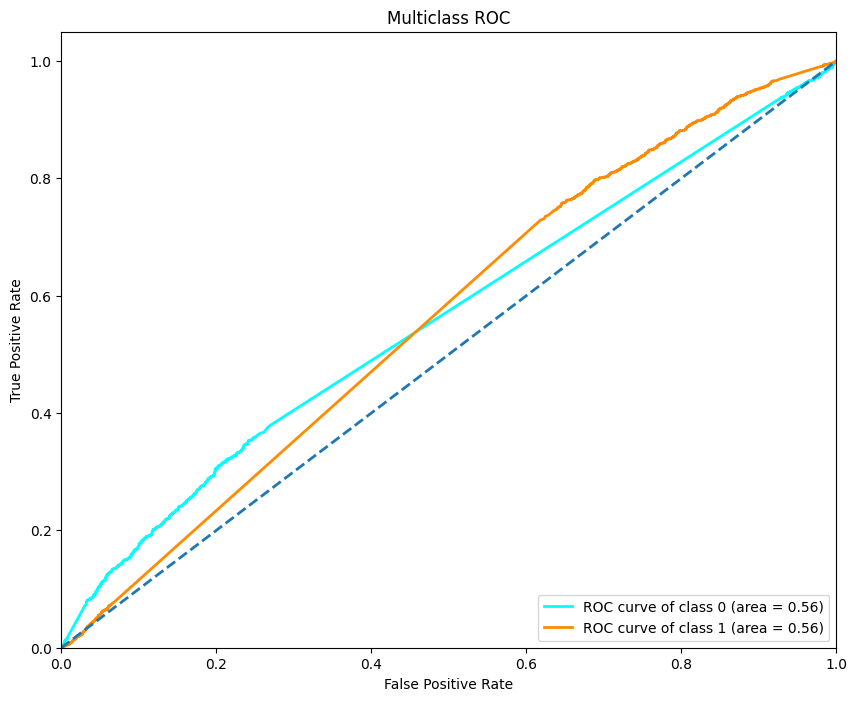

In [75]:
n_classes = y_test.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
lw = 2
for i, color in zip(range(n_classes),['aqua', 'darkorange']):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], '--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC')
plt.legend(loc="lower right")
plt.show()